In [12]:
# @title Figure Settings
import ipywidgets as widgets       # interactive display
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/master/nma.mplstyle")

stimulus start: 0.0, stimulus end: 1.0
simulating 426 neurons. Start: Fri Jul 15 12:30:22 2022
sim end: Fri Jul 15 12:34:13 2022


INFO       width adjusted from 20. ms to 20.1 ms [brian2.monitors.ratemonitor.adjusted_width]


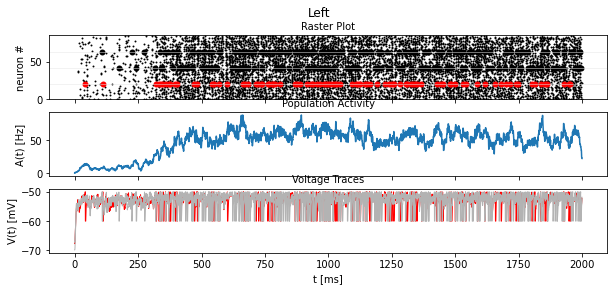

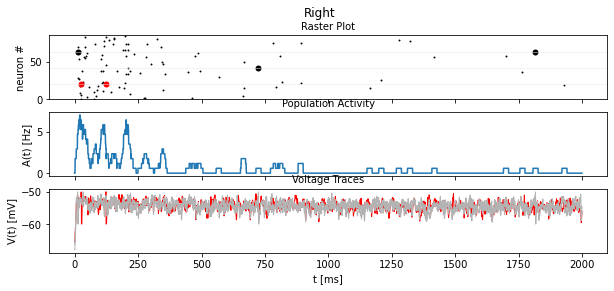

In [1]:
import wang

import brian2 as b2
from brian2 import NeuronGroup, Synapses, PoissonInput, PoissonGroup, network_operation
from brian2.monitors import StateMonitor, SpikeMonitor, PopulationRateMonitor
from random import sample
import numpy.random as rnd
from neurodynex3.tools import plot_tools
import numpy as np
import matplotlib.pyplot as plt
from math import floor
import time

b2.defaultclock.dt = 0.10 * b2.ms

%matplotlib inline
#from neurodynex3.competing_populations import decision_making

"""
A simple example to get started.
Returns:

"""
stim_start = 0. * b2.ms
stim_duration = 1000 * b2.ms
print("stimulus start: {}, stimulus end: {}".format(stim_start, stim_start+stim_duration))

results = wang.sim_decision_making_network(N_Excit=341, N_Inhib=85, weight_scaling_factor=6.0,
                                      t_stimulus_start=stim_start, t_stimulus_duration=stim_duration,
                                      coherence_level=+0.0, w_pos=2.0, mu0_mean_stimulus_Hz=250 * b2.Hz,
                                      max_sim_time=2000. * b2.ms)
plot_tools.plot_network_activity(results["rate_monitor_A"], results["spike_monitor_A"],
                                 results["voltage_monitor_A"], t_min=0. * b2.ms, avg_window_width=20. * b2.ms,
                                 sup_title="Left")
plot_tools.plot_network_activity(results["rate_monitor_B"], results["spike_monitor_B"],
                                 results["voltage_monitor_B"], t_min=0. * b2.ms, avg_window_width=20. * b2.ms,
                                 sup_title="Right")

plt.show()

In [2]:
import pandas as pd

In [23]:
rmp_A = results["voltage_monitor_A"]
rmp_B = results["voltage_monitor_B"]

n_time = len(rmp_A[3].v)

n_sample_cells = np.shape(rmp_A)[0]
rmp_mat_A = np.zeros([n_sample_cells, n_time])

In [24]:
for i in range(n_sample_cells):
    rmp_mat_A[i,:] = rmp_A[i].v/b2.mV
    
rmp_mat_A_ave=(rmp_mat_A.mean(axis=0))


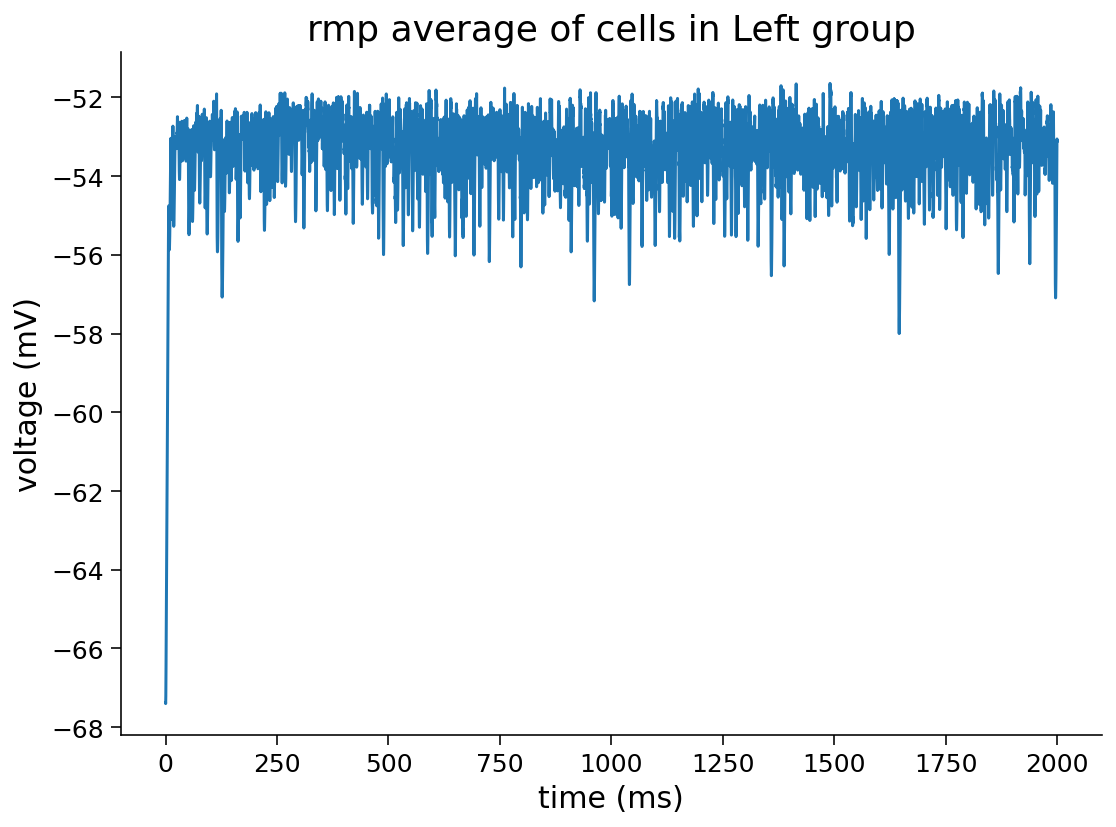

-53.44104286351333

In [30]:
plt.plot(rmp_B[0].t/b2.ms, rmp_mat_A_ave)
plt.xlabel('time (ms)')
plt.title('rmp average of cells in Left group')
plt.ylabel('voltage (mV)')

plt.show()
rmp_mat_A_ave.mean()

In [31]:
rmp_mat_B = np.zeros([n_sample_cells, n_time])


for i in range(n_sample_cells):
    rmp_mat_B[i,:] = rmp_B[i].v/b2.mV
    

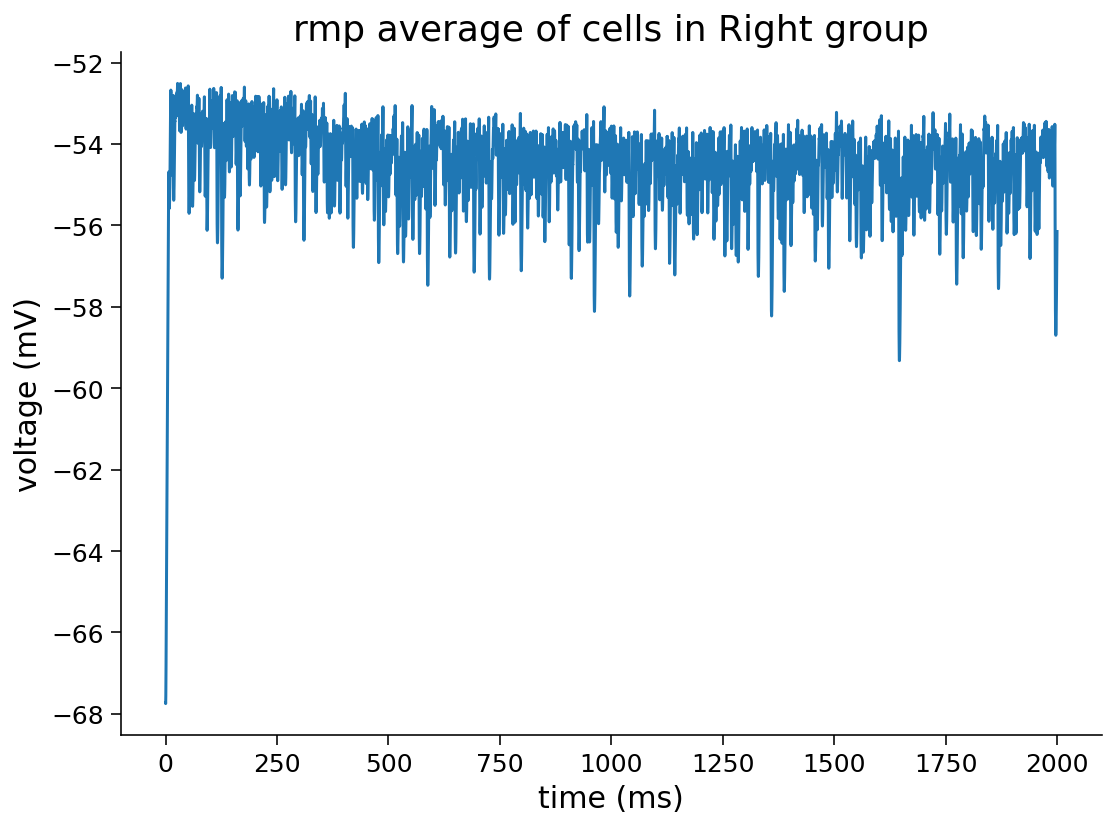

-54.61882076621256

In [32]:
rmp_mat_B_ave=(rmp_mat_B.mean(axis=0))

plt.plot(rmp_B[0].t/b2.ms, rmp_mat_B_ave)
plt.xlabel('time (ms)')
plt.title('rmp average of cells in Right group')
plt.ylabel('voltage (mV)')

plt.show()

rmp_mat_B_ave.mean()